In [8]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from scipy.integrate import quad

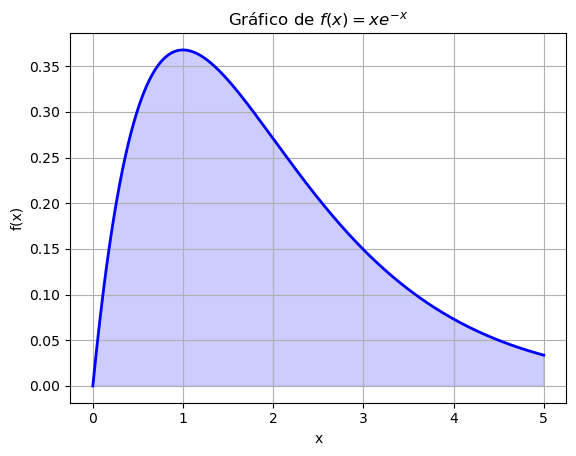

In [11]:
# Função
def f(x):
    return x * np.exp(-x)

# Plot
x = np.linspace(0, 5, 500)
plt.plot(x, f(x), 'b-', linewidth=2)
plt.fill_between(x, f(x), alpha=0.2, color='blue')
plt.title(r'Gráfico de $f(x) = xe^{-x}$')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(True)
plt.show()

# Integral analítica
def F(x):
    return - (x + 1) * np.exp(-x)

integral_analitica = F(5) - F(0)  # ≈ 0.959572

In [15]:
# Definindo a funcao f(x)-------------------------------------------------
def f(x):
	 return x * np.exp(-x)


# Definindo funcao  para executar o metodo do trapezoide------------------
def trapezoide(a,b,n):
	h=(b-a)/n
	s=0
	for i in range(n-1):
		s+=f(a+h*(i+1))
	return h/2*(f(a)+2*s+f(b))
# Metodo do trapezio------------------------------------------------------
for i in range(0,ordem):
	rom[i,0] = trapezoide(0,2,2**i)

print("Trapezio:\n", rom, "\n\n")

Trapezio:
 [[0.27067057 0.         0.         0.         0.         0.        ]
 [0.50321472 0.         0.         0.         0.         0.        ]
 [0.57058765 0.         0.         0.         0.         0.        ]
 [0.58809645 0.         0.         0.         0.         0.        ]
 [0.59251682 0.         0.         0.         0.         0.        ]
 [0.59362464 0.         0.         0.         0.         0.        ]] 




37614.23419165259


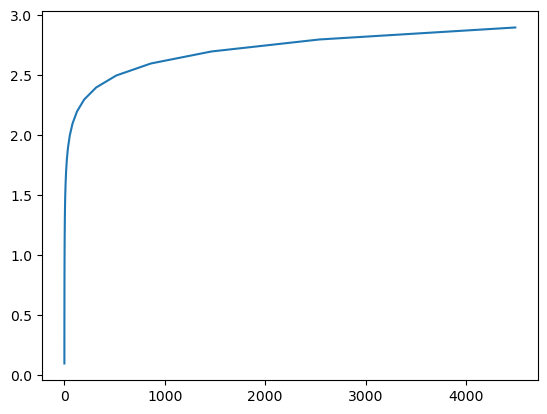

In [6]:
a = 0
b = 3
n = 30
delta_x = (b-a)/n
quantidade_somas = list(np.arange(delta_x,b, delta_x))

res = delta_x/3

soma_termos = (np.exp(pow(0, 2))) + (np.exp(pow(-3, 2)))

for i in quantidade_somas:
    if(quantidade_somas.index(i)%2 == 0):
       soma_termos = soma_termos + 2*(np.exp(pow(-i,2)))
    else:
        soma_termos = soma_termos + 4*(np.exp(pow(-i, 2)))

res = res*soma_termos

print(soma_termos)

y = np.arange(delta_x, b, delta_x)
x = np.exp(pow(-y, 2))
plt.plot(x, y)
plt.show()
